In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'Balance'], axis='columns', inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,1,1,1,101348.88,1
1,608,Spain,Female,41,1,1,0,1,112542.58,0
2,502,France,Female,42,8,3,1,0,113931.57,1
3,699,France,Female,39,1,2,0,0,93826.63,0
4,850,Spain,Female,43,2,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
columns = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

In [10]:
for col in columns:
    print(df[col].unique)


<bound method Series.unique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>
<bound method Series.unique of 0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object>
<bound method Series.unique of 0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64>
<bound method Series.unique of 0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64>
<bound method Series.unique of 0       1
1       1
2       3
3       2
4       1
       ..
9995    2
9996    1
9997    

In [11]:
df['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [12]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8851,782,Germany,0,42,7,1,1,0,39830.10,0
6103,655,France,0,28,10,2,0,1,126565.21,0
8196,588,France,0,30,3,1,0,0,176858.50,0
9701,678,Spain,0,38,3,1,1,0,126253.31,0
7758,711,France,0,41,3,2,1,1,193747.57,0


In [13]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [14]:
df1.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,1,1,1,79084.10,0,0,0,1


In [15]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']

In [19]:
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [20]:
df1.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.000000,1,1,0.395400,0,0,0,1


In [21]:
df1['NumOfProducts'].unique

<bound method Series.unique of 0       0.000000
1       0.000000
2       0.666667
3       0.333333
4       0.000000
          ...   
9995    0.333333
9996    0.000000
9997    0.000000
9998    0.333333
9999    0.000000
Name: NumOfProducts, Length: 10000, dtype: float64>

In [22]:
import tensorflow as tf

In [23]:
from tensorflow import keras

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df1.drop('Exited', axis='columns')

In [26]:
y = df1['Exited']

In [27]:
X

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,1,1,0.506735,1,0,0
1,0.516,1,0.310811,0.1,0.000000,0,1,0.562709,0,0,1
2,0.304,1,0.324324,0.8,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.000000,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.333333,1,0,0.481341,1,0,0
9996,0.332,0,0.229730,1.0,0.000000,1,1,0.508490,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0,1,0.210390,1,0,0
9998,0.844,0,0.324324,0.3,0.333333,1,0,0.464429,0,1,0


In [28]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [31]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
235/235 [==============================] - 36s 2ms/step - loss: 0.5466 - accuracy: 0.7685
Epoch 2/500
235/235 [==============================] - 1s 2ms/step - loss: 0.4915 - accuracy: 0.7953
Epoch 3/500
235/235 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.7969
Epoch 4/500
235/235 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.8016
Epoch 5/500
235/235 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.8047
Epoch 6/500
235/235 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8069
Epoch 7/500
235/235 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8085
Epoch 8/500
235/235 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8117
Epoch 9/500
235/235 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8132
Epoch 10/500
235/235 [==============================] - 1s 2ms/step - loss: 0.4307 - accur

235/235 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8555
Epoch 82/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8553
Epoch 83/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8545
Epoch 84/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8553
Epoch 85/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8571
Epoch 86/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8561
Epoch 87/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8561
Epoch 88/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8563
Epoch 89/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8565
Epoch 90/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 

235/235 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8621
Epoch 161/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8623
Epoch 162/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8601
Epoch 163/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8607
Epoch 164/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8597
Epoch 165/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8609
Epoch 166/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8612
Epoch 167/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8611
Epoch 168/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8607
Epoch 169/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3464 - a

235/235 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8607
Epoch 240/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8609
Epoch 241/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8608
Epoch 242/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8621
Epoch 243/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8621
Epoch 244/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8617
Epoch 245/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8617
Epoch 246/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8595
Epoch 247/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8619
Epoch 248/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3430 - a

235/235 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8619
Epoch 319/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8628
Epoch 320/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8613
Epoch 321/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8628
Epoch 322/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8625
Epoch 323/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8608
Epoch 324/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8623
Epoch 325/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8633
Epoch 326/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8620
Epoch 327/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3413 - a

235/235 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8624
Epoch 398/500
235/235 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.8635
Epoch 399/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8619
Epoch 400/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8619
Epoch 401/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8616
Epoch 402/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8619
Epoch 403/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8627
Epoch 404/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8640
Epoch 405/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8636
Epoch 406/500
235/235 [==============================] - 0s 2ms/step - loss: 0.3394 - a

235/235 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8636
Epoch 477/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8636
Epoch 478/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8628
Epoch 479/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8629
Epoch 480/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8636
Epoch 481/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8655
Epoch 482/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8636
Epoch 483/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8628
Epoch 484/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8649
Epoch 485/500
235/235 [==============================] - 0s 1ms/step - loss: 0.3370 - a

In [32]:
# import pickle

In [33]:
# with open("my_model", "wb") as f:
#     pickle.dump(model, f)

In [47]:
model.save('my_model.h5', model)

In [46]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8536


[0.35423555970191956, 0.853600025177002]

In [35]:
yp = model.predict(X_test)

79/79 [==============================] - 0s 1ms/step


In [36]:
yp[:5]

array([[0.06644861],
       [0.03278833],
       [0.06706569],
       [0.0530827 ],
       [0.01901138]], dtype=float32)

In [37]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [38]:
from sklearn.metrics import classification_report

In [39]:
y_pred = []
for y in yp:
    if y > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1999
           1       0.70      0.47      0.56       501

    accuracy                           0.85      2500
   macro avg       0.79      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500



In [41]:
# h =my_t.predict(X_test)
# y_pred = []

In [42]:
# for i in range(len(X_test)):
#     if h[i] > 0.5:
#         y_pred.append(1)
#     else:
#         y_pred.append(0)


In [43]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1901   98]
 [ 268  233]]


<AxesSubplot:>

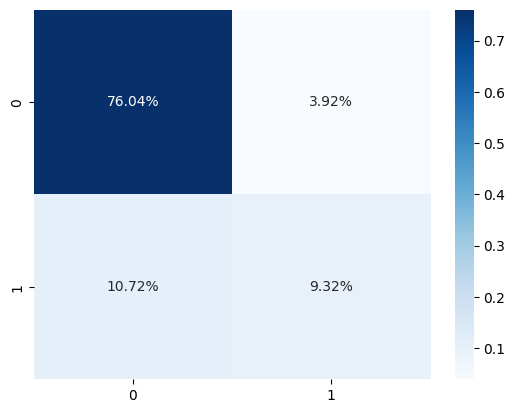

In [44]:
import seaborn as sns
import numpy as np
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

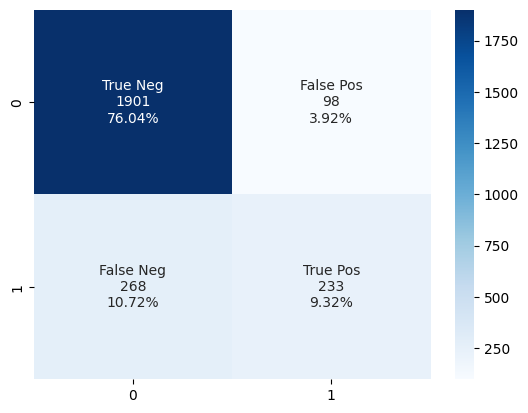

In [45]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
import matplotlib.pyplot as plt
plt.savefig('confusion matrix.png')